# General Linear Model

This example shows how to simulate and recover parameters for a simple linear
regression model.  Each subject has their own regression coefficients and we fit
all subjects simultaneously using ``EMModel``.

In [ ]:
import numpy as np
from pyem import EMModel
from pyem.utils import plotting
from pyem.models.glm import glm_sim, glm_fit # GLM

In [3]:
# simulate data
nsubjects, nparams, ntrials = 80, 3, 100
true_params = np.random.randn(nsubjects, nparams)
X, Y = glm_sim(true_params, ntrials=ntrials)
all_data = [[X[i], Y[i]] for i in range(nsubjects)]

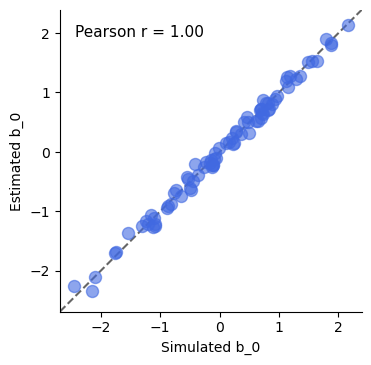

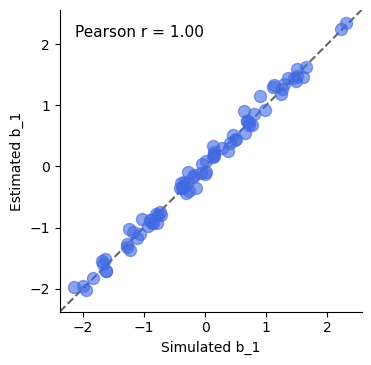

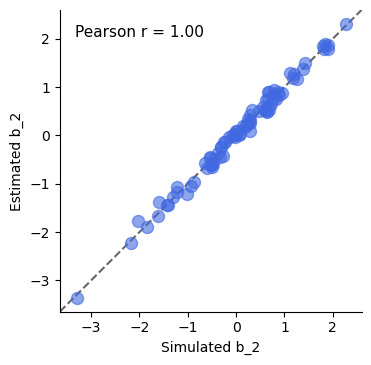

In [4]:
# fit and recover
model = EMModel(all_data=all_data, fit_func=glm_fit,
                param_names=[f"b{i}" for i in range(nparams)])
result = model.fit(verbose=0)

for param_idx, param_label in enumerate(range(nparams)):
    simulated_param = true_params[:,param_idx]
    estimated_param = model.outfit['params'][:,param_idx]
    ax = plotting.plot_scatter(simulated_param, f'Simulated b_{param_label}', 
                               estimated_param, f'Estimated b_{param_label}')

<hr style="width:50%">

In [ ]:
# try a logistic GLM
from pyem.models.glm import logit_sim, logit_fit

In [6]:
# simulate data
nsubjects, nparams, ntrials = 80, 3, 100  # intercept + 2 predictors
rng = np.random.default_rng(0)
true_params = rng.normal(size=(nsubjects, nparams))

X, Y = logit_sim(true_params, ntrials=ntrials)
all_data = [[X[i], Y[i]] for i in range(nsubjects)]

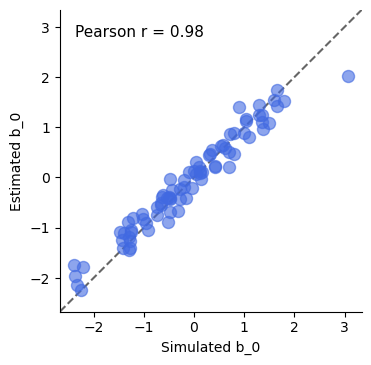

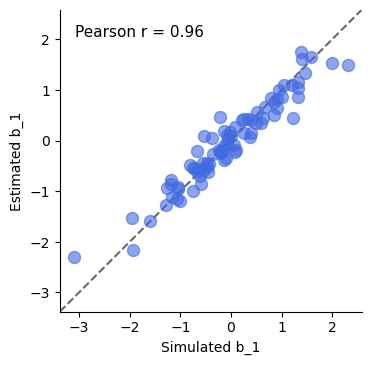

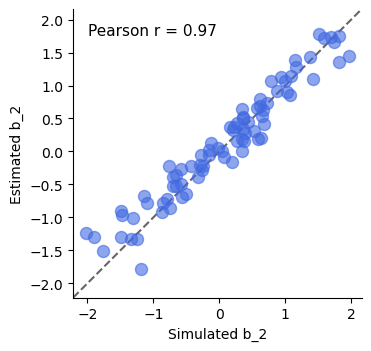

In [7]:
# fit and recover
model = EMModel(
    all_data=all_data,
    fit_func=logit_fit,
    param_names=[f"b{i}" for i in range(nparams)],
)
result = model.fit(verbose=0)

# compare simulated vs estimated for each coefficient
for j in range(nparams):
    simulated_param = true_params[:, j]
    estimated_param = model.outfit["params"][:, j]
    ax = plotting.plot_scatter(
        simulated_param, f"Simulated b_{j}",
        estimated_param, f"Estimated b_{j}"
    )

<hr style="width:50%">

In [ ]:
# try an AR(1) GLM
from pyem.models.glm import glm_ar_sim, glm_ar_fit

In [9]:
# simulate data
nsubjects, nparams, ntrials = 80, 3, 100
true_params = np.random.randn(nsubjects, nparams-1)
true_params = np.hstack([true_params, np.random.uniform(0,1,(nsubjects,1))])  # add phi
X, Y = glm_ar_sim(true_params, ntrials=ntrials)
all_data = [[X[i], Y[i]] for i in range(nsubjects)]

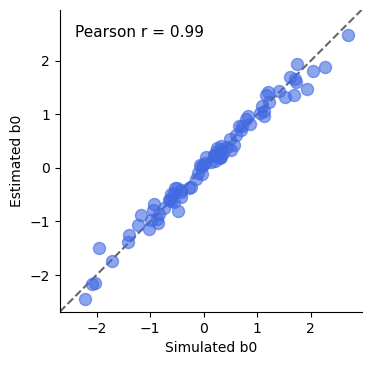

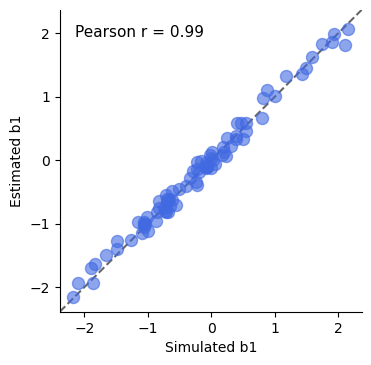

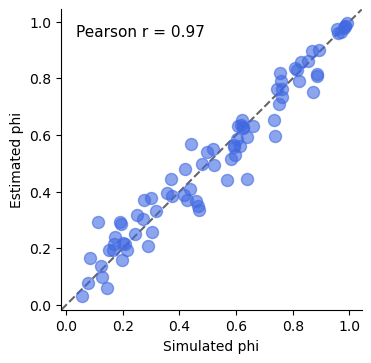

In [10]:
# fit and recover
param_names = [f"b{i}" for i in range(nparams-1)]+['phi']
model = EMModel(all_data=all_data, fit_func=glm_ar_fit,
                param_names=param_names,)
result = model.fit(verbose=0)

for param_idx, param_label in enumerate(param_names):
    simulated_param = true_params[:,param_idx]
    estimated_param = model.outfit['params'][:,param_idx]
    ax = plotting.plot_scatter(simulated_param, f'Simulated {param_label}', 
                               estimated_param, f'Estimated {param_label}')